# 13. Textual Analysis (NLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [3]:
#predict sentiment based on news headlines
df = pd.read_csv('data13_LabeledNewsData.csv', encoding = "ISO-8859-1")
df.sample(5)

,datetime,headline,ticker,sentiment
7768,1/12/19 7:35,As United Technologies Corp (UTX) Shares Decli...,UTX,0
3309,4/29/19 12:18,$XOM - Exxon Mobil: Strong Buy,XOM,1
7058,4/23/19 6:07,"$PG: Procter & Gamble beats by $0.02, reports ...",PG,1
6324,12/19/19 19:50,$NKE Nike quarterly revenue beats estimates,NKE,1
3957,7/18/19 12:35,IBM trades higher on Q2 results as investors a...,IBM,1


In [4]:
# Sentiment(1,0--> labeled data): supervised
y = df['sentiment']
text = df['headline']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.25, random_state=101)
text_test.sample(3)

6225    $NKE rallied to new all time highs and aiming ...
5651    $MRK beats the Estimize EPS Consensus by 23c a...
2422    Insider Selling: The Coca-Cola Co $KO SVP Sell...
Name: headline, dtype: object

## 1. Bag of Words

In [5]:

bw = CountVectorizer(lowercase=True, stop_words='english')  #Pre-processing
bw.fit(text_train)
dtm_train = bw.transform(text_train) #document text matrix transformation: text into vectors
dtm_test = bw.transform(text_test)

Accuracy score = 0.9096283783783784
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1029
           1       0.91      0.93      0.92      1339

    accuracy                           0.91      2368
   macro avg       0.91      0.91      0.91      2368
weighted avg       0.91      0.91      0.91      2368



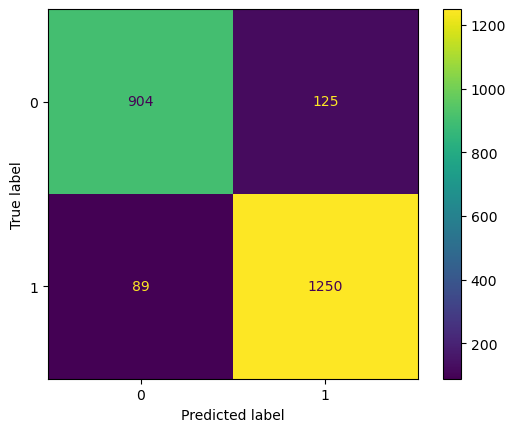

In [6]:
#Naive Bayes for prediction 
nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)

## 2. TF-IDF

In [11]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english',ngram_range=(1,2))
dtm_train = tfidf.fit_transform(text_train)
dtm_test = tfidf.transform(text_test)

Accuracy score = 0.8868243243243243
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1029
           1       0.85      0.98      0.91      1339

    accuracy                           0.89      2368
   macro avg       0.90      0.87      0.88      2368
weighted avg       0.90      0.89      0.88      2368



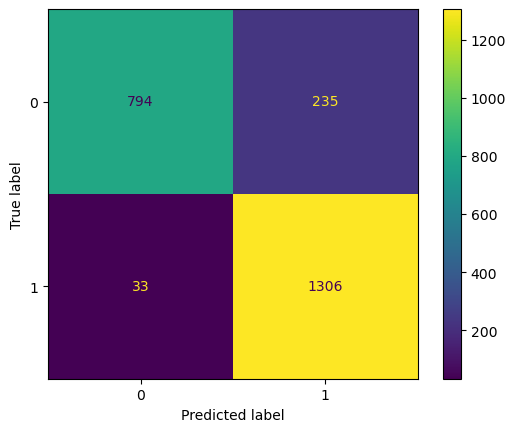

In [12]:
#Naive Bayes for prediction 
nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)

## Stemming

In [13]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [tkn for tkn in tokens if tkn not in string.punctuation] # , ,=,! ,?
    
    stems = map(PorterStemmer().stem, tokens)
    
    return stems

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soyyo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english',ngram_range=(1,2), tokenizer=tokenize)
dtm_train = tfidf.fit_transform(text_train)
dtm_test = tfidf.transform(text_test)

C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'there

Accuracy score = 0.8834459459459459
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1029
           1       0.84      0.98      0.90      1339

    accuracy                           0.88      2368
   macro avg       0.90      0.87      0.88      2368
weighted avg       0.90      0.88      0.88      2368



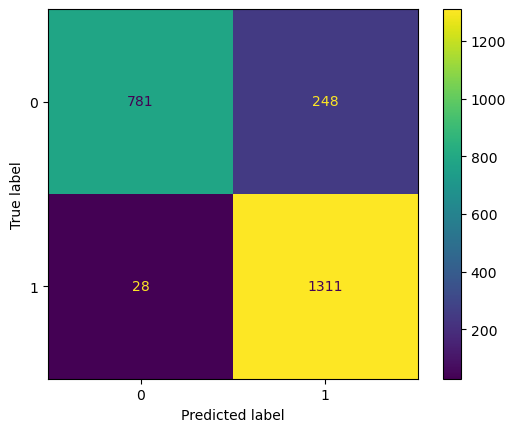

In [16]:
#Naive Bayes for prediction 
nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)